In [1]:
#!pip install pydicom

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import pydicom
#from pydicom.data import get_testdata_files
import cv2
from zipfile import ZipFile
import os
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm as tqdm
#Tensorboard

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
rootDir = '/content/drive/My Drive/Project_Pneumonia_Detection/'

Converting the images to a jpg format is a one time activity, which has been compleated

In [6]:
#with ZipFile('/content/drive/My Drive/Project_Pneumonia_Detection/stage_2_train_images.zip', 'r') as f:
#  for name in tqdm(f.namelist()):
#    x=f.extract(name)
#    dataset = pydicom.dcmread(x)
#    img2=dataset.pixel_array
#    name=name.split('.')[0]
    #print (name)
#    cv2.imwrite(f"/content/drive/My Drive/Project_Pneumonia_Detection/xray_train/{name}.jpg",img2) # create a folder xray2

In [7]:
#with ZipFile('/content/drive/My Drive/Project_Pneumonia_Detection/stage_2_test_images.zip', 'r') as f:
#  for name in tqdm(f.namelist()):
#    x=f.extract(name)
    #print(name)
#    dataset = pydicom.dcmread(x)
#    img2=dataset.pixel_array
#    name=name.split('.')[0]
    #print (name)
#    cv2.imwrite(f"/content/drive/My Drive/Project_Pneumonia_Detection/xray_test/{name}.jpg",img2) # create a folder xray2

In [8]:
minfo = pd.read_csv(rootDir + 'metadata_train_new.csv')

In [9]:
meta_pne = minfo.loc[minfo['class']==1]

In [10]:
print(len(meta_pne))

6012


In [11]:
meta_pne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6012 entries, 2 to 26679
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientid     6012 non-null   object 
 1   dob           0 non-null      float64
 2   gender        6012 non-null   object 
 3   age           6012 non-null   int64  
 4   bodypart      6012 non-null   object 
 5   viewposition  6012 non-null   object 
 6   rows          6012 non-null   int64  
 7   columns       6012 non-null   int64  
 8   opacityclass  6012 non-null   object 
 9   class         6012 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 516.7+ KB


In [12]:
# mydata=pd.read_csv('/content/drive/My Drive/Project_Pneumonia_Detection/stage_2_detailed_class_info.csv')
# mydata=mydata[0:20]
#mydata=meta_pne[0:1300]
mydata=meta_pne
#mydata=meta_pne

In [13]:
mydata.head()

,patientid,dob,gender,age,bodypart,viewposition,rows,columns,opacityclass,class
2,000db696-cf54-4385-b10b-6b16fbb3f985,NaN,F,25,CHEST,AP,1024,1024,Lung Opacity,1
3,000fe35a-2649-43d4-b027-e67796d412e0,NaN,M,40,CHEST,AP,1024,1024,Lung Opacity,1
4,001031d9-f904-4a23-b3e5-2c088acd19c6,NaN,M,57,CHEST,PA,1024,1024,Lung Opacity,1
6,001916b8-3d30-4935-a5d1-8eaddb1646cd,NaN,F,76,CHEST,AP,1024,1024,Lung Opacity,1
7,0022073f-cec8-42ec-ab5f-bc2314649235,NaN,M,31,CHEST,AP,1024,1024,Lung Opacity,1


In [14]:
# #mydata containg the data which is of class = 1

# train_image=[]

# for ind in tqdm(mydata.index):
#   # clas=class_data2['class'][ind]
#   # if(clas==1):
#     patient_id=mydata['patientid'][ind]
#     img=cv2.imread(f"/content/drive/My Drive/Project_Pneumonia_Detection/xray_train/{patient_id}.jpg")
#     img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

#     train_image.append(img)
# train_image=np.array(train_image)

In [15]:
# save the train_image as npy file
# from numpy import save #added to save the date in npy
# save(rootDir +'train_image_data.npy', train_image)

In [16]:
#load the train_image saved earlier
train_image = np.load(rootDir +'train_image_data.npy')

In [17]:
print(train_image)

[[[[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  7   7   7]
   [  5   5   5]
   [  5   5   5]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  6   6   6]
   [  6   6   6]
   [  6   6   6]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  6   6   6]
   [  6   6   6]
   [  6   6   6]]

  ...

  [[ 48  48  48]
   [ 29  29  29]
   [ 24  24  24]
   ...
   [144 144 144]
   [145 145 145]
   [144 144 144]]

  [[ 44  44  44]
   [ 36  36  36]
   [ 19  19  19]
   ...
   [142 142 142]
   [143 143 143]
   [141 141 141]]

  [[ 73  73  73]
   [ 32  32  32]
   [ 20  20  20]
   ...
   [143 143 143]
   [139 139 139]
   [145 145 145]]]


 [[[ 16  16  16]
   [ 17  17  17]
   [ 18  18  18]
   ...
   [ 19  19  19]
   [ 20  20  20]
   [  0   0   0]]

  [[ 15  15  15]
   [ 17  17  17]
   [ 18  18  18]
   ...
   [ 17  17  17]
   [ 19  19  19]
   [  0   0   0]]

  [[ 15  15  15]
   [ 16  16  16]
   [ 15  15  15]
   ...
   [ 17  17  17]
   [ 18  18  18]
   [  0   0

In [18]:
print(train_image.shape)

(6012, 224, 224, 3)


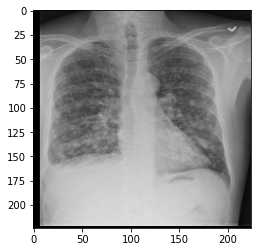

In [19]:
plt.imshow(train_image[2])

In [20]:
label_data=pd.read_csv('/content/drive/My Drive/Project_Pneumonia_Detection/stage_2_train_labels.csv')

In [21]:
label_data.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,000924cf-0f8d-42bd-9158-1af53881a557,NaN,NaN,NaN,NaN,0
2,000db696-cf54-4385-b10b-6b16fbb3f985,316.0,318.0,170.0,478.0,1
3,000db696-cf54-4385-b10b-6b16fbb3f985,660.0,375.0,146.0,402.0,1
4,000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1


In [22]:
# train_mask=[]
# pid=[]

# scale=224/1024
# for ind in tqdm(mydata.index): # class_data2 replaced with mydata
#   clas=mydata['class'][ind]

#   if(clas==1):
#     patient_id=mydata['patientid'][ind]
#     #print(patient_id)
#     pid.append(patient_id)
#     ld=label_data.loc[label_data['patientId'] == patient_id]
#     #print(ld)
#     z=np.zeros((224,224),np.uint8)
#     z=np.array(z,dtype=float)
#     for ind in tqdm(ld.index):
#       xmin=ld['x'][ind]*scale
#       ymin=ld['y'][ind]*scale
#       width=ld['width'][ind]*scale
#       height=ld['height'][ind]*scale
#       target=ld['Target'][ind]
#       z[int(ymin):int(ymin+height), int(xmin):int(xmin+width)] = 1
#     train_mask.append(z)
# train_mask=np.array(train_mask)

In [24]:
#save the train_image as npy file
# from numpy import save #added to save the date in npy
# save(rootDir +'train_mask_data.npy', train_mask)

In [25]:
#load the train_mask saved earlier
train_mask = np.load(rootDir +'train_mask_data.npy')

In [26]:
print(train_mask)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [27]:
#save the train_image as npy file
# from numpy import save #added to save the date in npy
# save(rootDir +'train_pid_data.npy', pid)

In [28]:
#load the train_image saved earlier
pid = np.load(rootDir +'train_pid_data.npy')

In [29]:
print(pid)

['000db696-cf54-4385-b10b-6b16fbb3f985'
 '000fe35a-2649-43d4-b027-e67796d412e0'
 '001031d9-f904-4a23-b3e5-2c088acd19c6' ...
 'ffd787b6-59ca-48cb-bd15-bcedd52cf37c'
 'fff0b503-72a5-446a-843d-f3d152e39053'
 'fffb2395-8edd-4954-8a89-ffe2fd329be3']


In [30]:
pid[1]

'000fe35a-2649-43d4-b027-e67796d412e0'

In [31]:
train_mask[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
print(pid)

['000db696-cf54-4385-b10b-6b16fbb3f985'
 '000fe35a-2649-43d4-b027-e67796d412e0'
 '001031d9-f904-4a23-b3e5-2c088acd19c6' ...
 'ffd787b6-59ca-48cb-bd15-bcedd52cf37c'
 'fff0b503-72a5-446a-843d-f3d152e39053'
 'fffb2395-8edd-4954-8a89-ffe2fd329be3']


In [33]:
pid[1]

'000fe35a-2649-43d4-b027-e67796d412e0'

In [34]:
train_mask[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(6012, 224, 224, 3)
(6012, 224, 224)
001031d9-f904-4a23-b3e5-2c088acd19c6


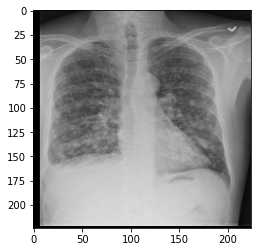

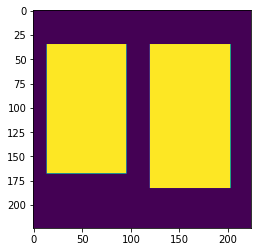

In [35]:
n=2
print(train_image.shape)
print(train_mask.shape)
print(pid[n])
plt.imshow(train_image[n])
plt.show()
plt.imshow(train_mask[n])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import h5py

In [37]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(224, 224, 3),
              alpha=1.0,
              depth_multiplier=1,
              dropout=1e-3,
              include_top=True,
              weights='imagenet',
              input_tensor=None,
              pooling=None,
              classes=1000)
    for layer in model.layers:
        layer.trainable = trainable


        # Add all the UNET layers here
        #### Add your code here ####
    block0 = model.get_layer("conv_pw_1_relu").output 
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    #x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((224, 224))(x)

    # model = Model(input = inputs, output = x)
    # model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    # if(pretrained_weights):
    #   model.load_weights(pretrained_weights)

    return Model(inputs=model.input, outputs=x)



In [38]:
model = create_model(False)

model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

In [39]:
def dice_coefficient(y_true, y_pred):
  
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)
  return numerator / (denominator + tf.keras.backend.epsilon())

In [40]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [41]:
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

In [42]:
mc1 = ModelCheckpoint(rootDir +'Capstone_best_model_6000_VL_min.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
#mc1 = ModelCheckpoint(rootDir +'Capstone_best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")

In [43]:
print(train_image.shape)

(6012, 224, 224, 3)


In [44]:
print(train_mask.shape)

(6012, 224, 224)


In [45]:
import tensorflow as tf
history= model.fit(
    x=train_image,
    y=train_mask,
    callbacks=[mc1, stop],
    batch_size=4,    
    epochs=6,
    use_multiprocessing=True,
    validation_split=0.3,
    verbose=1
    #validation_data=(X_valid, y_valid),
    #validation_data=X_valid,
    #callbacks=[mc1]
    )

Epoch 1/6
1052/1052 [==============================] - ETA: 0s - loss: 1.1610 - dice_coefficient: 0.4442
Epoch 00001: val_loss improved from inf to 1.07759, saving model to /content/drive/My Drive/Project_Pneumonia_Detection/Capstone_best_model_6000_VL_min.h5
1052/1052 [==============================] - 2751s 3s/step - loss: 1.1610 - dice_coefficient: 0.4442 - val_loss: 1.0776 - val_dice_coefficient: 0.4753
Epoch 2/6
1052/1052 [==============================] - ETA: 0s - loss: 1.0555 - dice_coefficient: 0.4827
Epoch 00002: val_loss did not improve from 1.07759
1052/1052 [==============================] - 2747s 3s/step - loss: 1.0555 - dice_coefficient: 0.4827 - val_loss: 1.0870 - val_dice_coefficient: 0.4551
Epoch 3/6
1052/1052 [==============================] - ETA: 0s - loss: 1.0348 - dice_coefficient: 0.4909
Epoch 00003: val_loss improved from 1.07759 to 1.03496, saving model to /content/drive/My Drive/Project_Pneumonia_Detection/Capstone_best_model_6000_VL_min.h5
1052/1052 [=======

In [47]:
from numpy import savetxt
savetxt(rootDir+'history_6000.csv',history, delimiter=',')

ValueError: ignored

In [48]:
print(history)

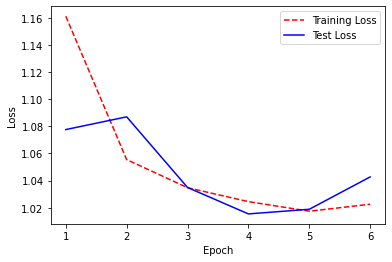

In [49]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
#test_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
model.load_weights(rootDir + 'Capstone_best_model_6000_VL_min.h5')

In [ ]:
print(model.load_weights(rootDir + 'Capstone_best_model_6000_VL_min.h5'))